# Sentiment Analysis

In this file, using two different algorithms (from nltk and from a hugging face pipeline), we produce new features based on sentiment analysis.

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

In [3]:
from tqdm.auto import tqdm
tqdm.pandas()

In [4]:
target = 'num_likes'

## Simple approach

In [ ]:
# df['text_str'][0].split('\n')

The sentiment analysis below is the simplest version. We take the tokens that appear in the text and we apply sentiment analysis.



In [ ]:
# # If we want to get rid of \n and the remaining html code
# def join_into_str(row):
#   row['words_in_str'] = ''.join(row['story_word_toks'])
#   row['words_in_str'] = ' '.join(eval(row['words_in_str']))
#   return row

# df = df.progress_apply(join_into_str, axis=1)

### We use nltk pretrained model
Info on the vader lexicon: https://www.kaggle.com/datasets/nltkdata/vader-lexicon

The model returns a score between -1 and 1, -1 being negative, 1 positive and 0 neutral.

####Apply model

In [ ]:
if 'sentiment_nltk_text' not in df.columns:

  import nltk
  from textblob import TextBlob
  from nltk.sentiment import SentimentIntensityAnalyzer
  nltk.download('vader_lexicon')
  sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def get_sent(row):
  try:
    row['sentiment_nltk_text'] = TextBlob(row['text_str']).sentiment.polarity
    return row
  except:
    print('error')

if 'sentiment_nltk_text' not in df.columns:
  df = df.progress_apply(get_sent, axis=1)
  df[['sentiment_nltk_text']].to_csv('drive/MyDrive/Final Project/sentiment_features/sentiment_nltk_text.csv', index=False)

  0%|          | 0/18248 [00:00<?, ?it/s]

####Light EDA

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of sentiment_nltk_text')

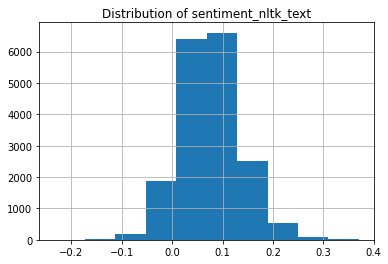

In [ ]:
df['sentiment_nltk_text'].hist()
plt.title('Distribution of sentiment_nltk_text')

In [ ]:
cor_ = df['sentiment_nltk_text'].corr(df['num_likes'])

Text(0.5, 1.0, 'sentiment_nltk_text vs. num_likes, coef = -0.02')

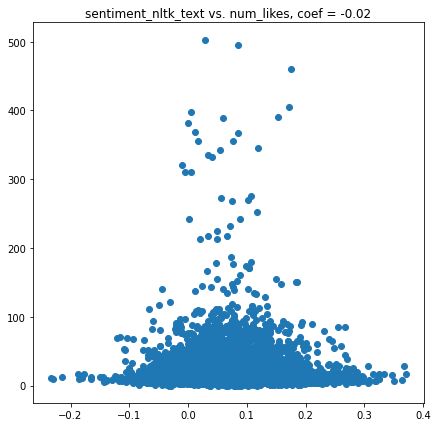

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(df['sentiment_nltk_text'], df['num_likes'])
plt.title(f'sentiment_nltk_text vs. num_likes, coef = {cor_:.2f}')

It looks like a non linear correlation. Interesting!

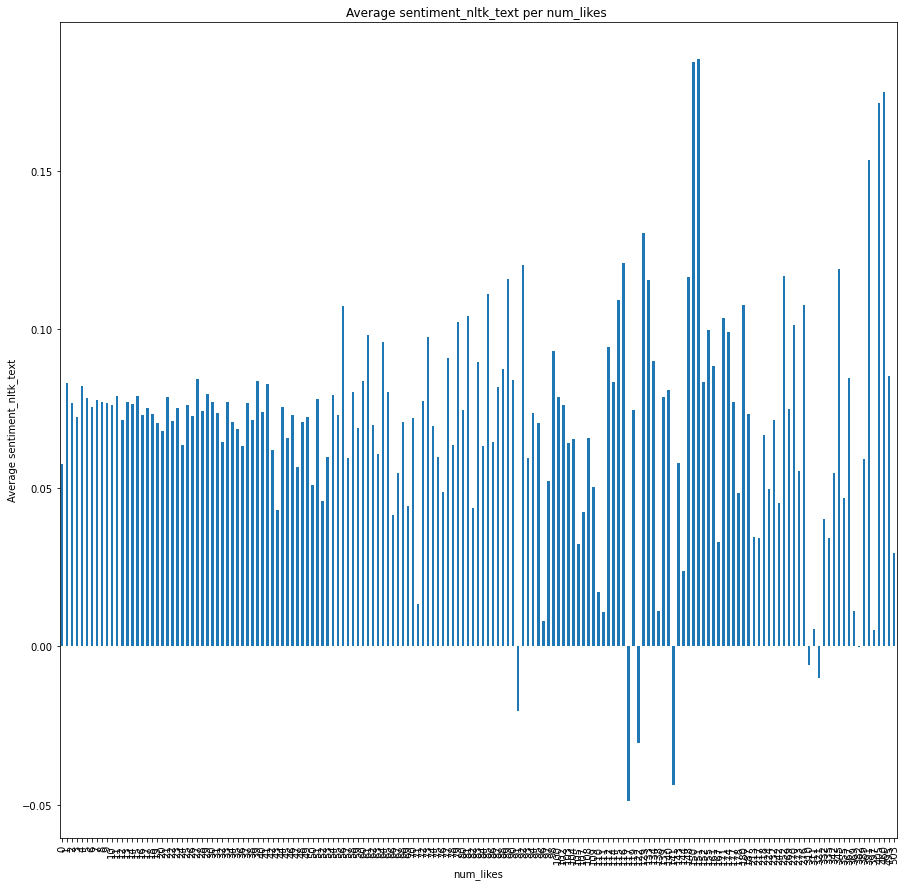

In [ ]:
polarity_avg = df.groupby('num_likes')['sentiment_nltk_text'].mean().plot(kind='bar', figsize=(15,15))
plt.xlabel('num_likes')
plt.ylabel('Average sentiment_nltk_text')
plt.xticks()
plt.yticks()
plt.title('Average sentiment_nltk_text per num_likes ')
plt.show()


###Using hugging face pre trained model

In [5]:
! pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
sentiment_pipeline(['The world is kind of... you know... not so great'])

     |████████████████████████████████| 4.2 MB 5.0 MB/s 
     |████████████████████████████████| 596 kB 51.2 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 6.6 MB 44.3 MB/s 


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9984616041183472}]

In [ ]:
sentiment_pipeline([df['text_str'][0][:2000]])

[{'label': 'NEGATIVE', 'score': 0.998582124710083}]

In [ ]:
df['text_str'][0][:2000]

'\n11:59\xa0\xa0\n\tI shoot straight out of bed to an ear piercing alarm right outside my door.\xa0 The walls of this room are a dull white.\xa0 Every day that passes it seems as though those walls are closing in on me.\xa0 The bed feels as though I am sleeping on just springs.\xa0 The only other items in this room are a sink and a toilet.\xa0 The door, my only release from this hole, is so thick a bullet would not even pierce it.\xa0 There is a small window in here, which is more just a tease than anything else, showing me green grass for miles.\xa0 I have had to look at that and this depressing room for nine years, only leaving when I have a visitor.\xa0 Today though is different, today is the day I die.\xa0 This place is hell, this place is death row.\xa0 Every single day of my miserable nine years here, which is exactly 3,287 days, I have looked back at what got me here and thought about my life before I was sent here.\xa0 Today is no different.\xa0\n***\n\tI pull into the garage p

The classification is quite accurate (speaking of 'hell', 'death'...).

The inputs to the model cannot excede a certain length. We therefore take the first 1500 characters of the text.

In [ ]:
def sentiment_pipeline_def(row):
  try:
    row['sentiment_hf_text'] = sentiment_pipeline(row['text_str'][:1500])
    return row
  except:
    print('error: text too long?')

def get_label(x):
  if x:
    return x[0]['label']

In [ ]:
if 'sentiment_hf_text' not in df.columns:
  df = df.progress_apply(sentiment_pipeline_def, axis=1) # df['sentiment_hf_text']
  df['sentiment_hf_text'] = df['sentiment_hf_text'].progress_apply(get_label)
  df['sentiment_hf_text'] = df['sentiment_hf_text'].map({'NEGATIVE':-1, 'POSITIVE':1, None:0})
  df[['sentiment_hf_text']].to_csv('drive/MyDrive/Final Project/sentiment_features/sentiment_hf_text.csv', index=False)

  0%|          | 0/18248 [00:00<?, ?it/s]

error: text too long?
error: text too long?


The code ran and the output was extracted.

### EDA

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
df = pd.read_csv('drive/MyDrive/Final Project/sentiment_features/sentiment_hf_text.csv')
df_target = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv", usecols=['num_likes'])

In [58]:
df = pd.concat([df, df_target], axis=1, join='inner')

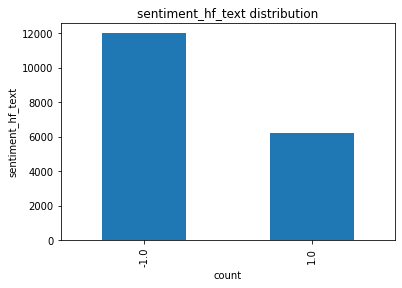

In [59]:
df['sentiment_hf_text'].value_counts().plot(kind = 'bar');
plt.title('sentiment_hf_text'+' distribution')
plt.xlabel('count')
plt.ylabel('sentiment_hf_text');

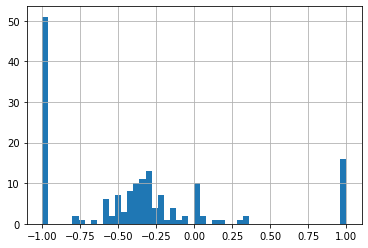

In [60]:
df.groupby('num_likes')['sentiment_hf_text'].mean().hist(bins=50)

## Per Paragraph without preprocessing

The right way to go is to take the whole text, do a sentiment analysis paragraph by paragraph, and take the mean of the sentiment score.

We use the features text_str and paragraphs.

In [ ]:
df['paragraphs'] = df['text_str'].str.split('\n')

### NLTK

In [ ]:
import numpy as np
def sentiment_noprepro(row):
  sent = []
  try:
    for x in row['paragraphs']:
      try:
        sent.append(sia.polarity_scores(x)['compound'])
      except:
        pass
    row['sentiment_parag_nltk_no_prepro'] = np.mean(sent)
  except:
    print('error')
  return row

In [ ]:
if 'sentiment_parag_nltk_no_prepro' not in df.columns:
  df = df.progress_apply(sentiment_noprepro, axis=1) #df['sentiment_parag_nltk_no_prepro']
  df[['sentiment_parag_nltk_no_prepro']].to_csv('drive/MyDrive/Final Project/sentiment_features/sentiment_parag_nltk_no_prepro.csv', index=False)

####EDA

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
df = pd.read_csv('drive/MyDrive/Final Project/sentiment_features/sentiment_parag_nltk_no_prepro.csv')
df_target = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv", usecols=['num_likes'])
df = pd.concat([df, df_target], axis=1, join='inner')

Text(0.5, 1.0, 'Target vs. sentiment_parag_nltk_no_prepro after normalization')

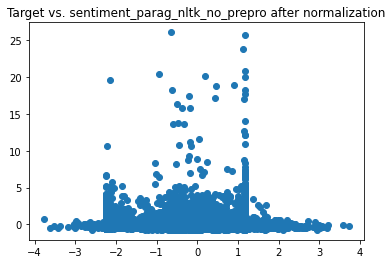

In [68]:
plt.scatter((df.sentiment_parag_nltk_no_prepro-np.mean(df.sentiment_parag_nltk_no_prepro))/np.std(df.sentiment_parag_nltk_no_prepro), (df.num_likes-np.mean(df.num_likes))/np.std(df.num_likes))
plt.title("Target vs. sentiment_parag_nltk_no_prepro after normalization")

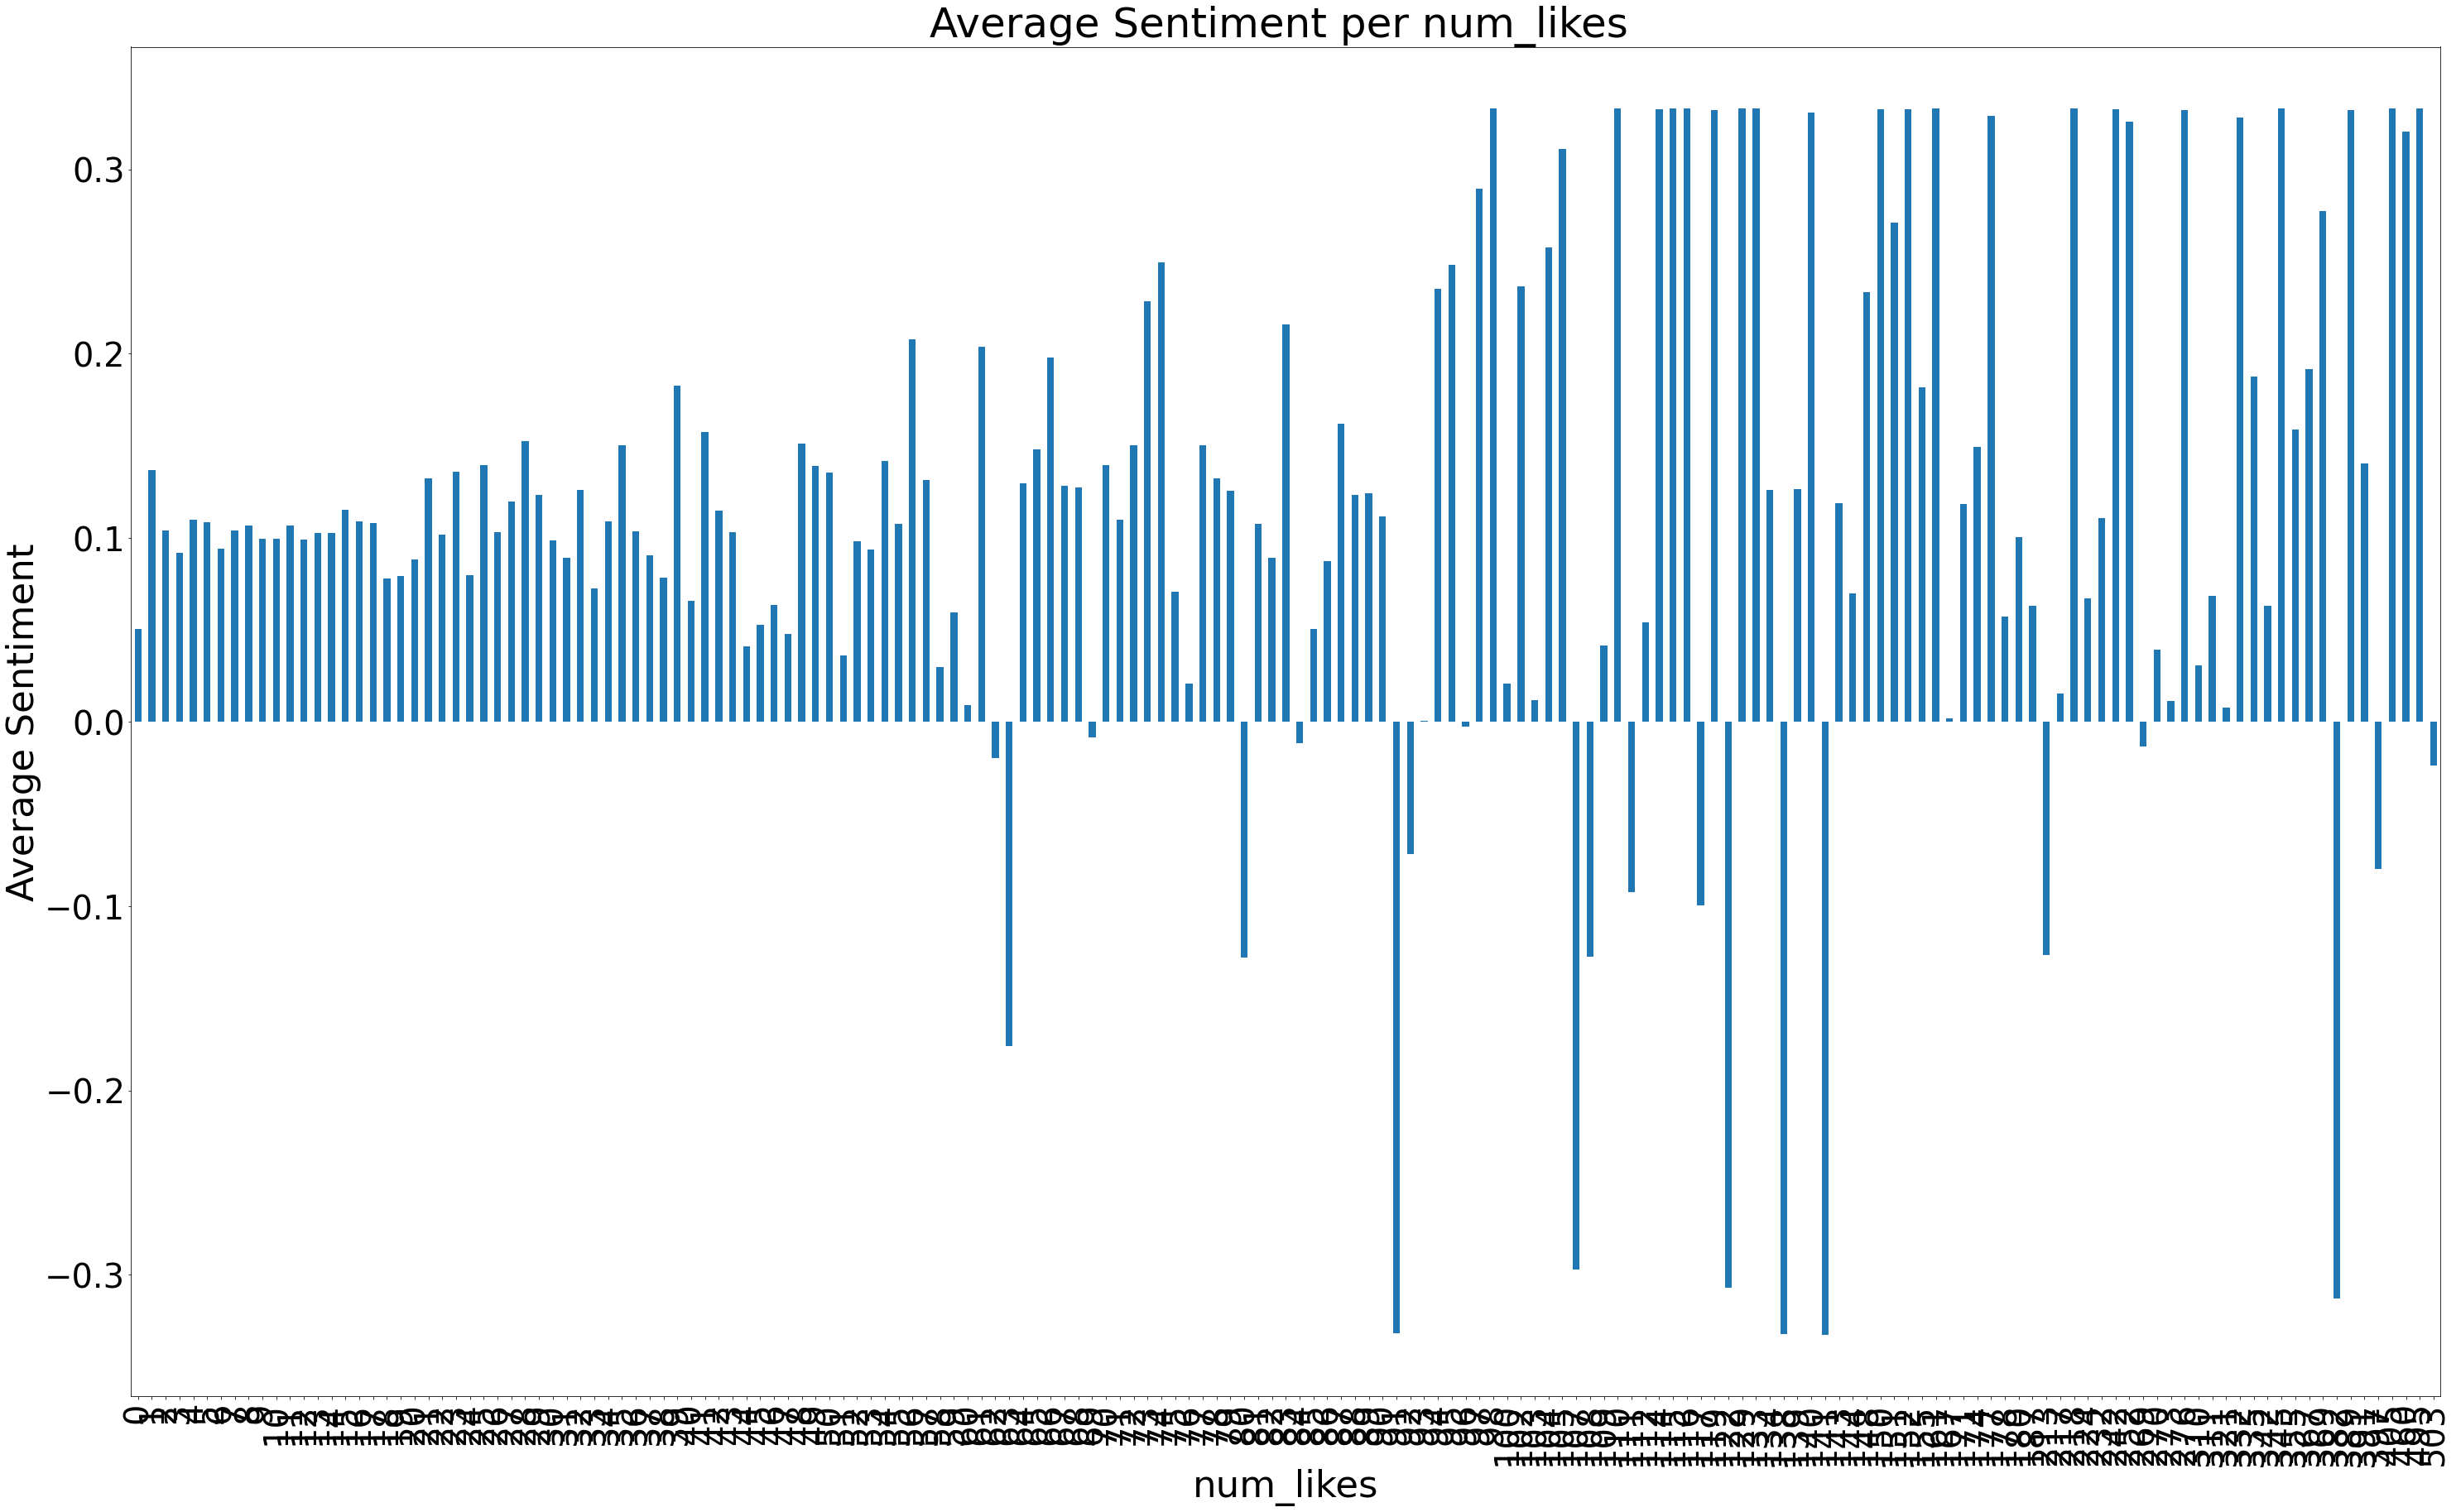

In [69]:
polarity_avg = df.groupby('num_likes')['sentiment_parag_nltk_no_prepro'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('num_likes', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per num_likes ', fontsize=50)
plt.show()


### hugging face

In [ ]:
def sentiment_pipeline_def_noprepro(row):
  sent = []
  try:
    for para in row['paragraphs']:
      try:
        sent.append(sentiment_pipeline(para[:1500])[0]['label'])
      except:
        pass
    for label in set(sent):
      row['sentiment_' + label + '_no_prepro'] = sent.count(label)/len(row['paragraphs'])
    return row
  except:
    print('error: text too long?')

def get_label(x):
  if x:
    return x[0]['label']

In [ ]:
splits = 80
chunk_size = int(df.shape[0] / splits-1)
df_subset = dict()
for start in range(0, df.shape[0], chunk_size):
    df_subset[start] = df.iloc[start:start + chunk_size]
fract = list(df_subset.keys())
for i,j in zip(range(1, len(fract)+1), fract):
  df_subset[i] = df_subset.pop(j)

In [6]:
# each sentence
for i in tqdm(range(1, 82)):
  # apply function
  
  df_subset__ = df_subset[i].progress_apply(sentiment_pipeline_def_noprepro, axis=1) # df['sentiment_POSITIVE_no_prepro'] df['sentiment_NEGATIVE_no_prepro']
    
  # save csv
  df_subset__[['sentiment_POSITIVE_no_prepro', 'sentiment_NEGATIVE_no_prepro']].to_csv(f'drive/MyDrive/Final Project/sentiment_features/hf_noprepro/sentiment_hf_parag_no_prepro_subset_{i}.csv', index=False)

Merge the files

In [28]:
df_to_merge = pd.read_csv("drive/MyDrive/Final Project/sentiment_features/hf_noprepro/sentiment_hf_parag_no_prepro_subset_1.csv")
for i in tqdm(range(2, 82)):
  to_add = pd.read_csv(f"drive/MyDrive/Final Project/sentiment_features/hf_noprepro/sentiment_hf_parag_no_prepro_subset_{i}.csv")
  df_to_merge = pd.concat([df_to_merge, to_add], axis=0)

  0%|          | 0/80 [00:00<?, ?it/s]

In [37]:
df_to_merge.to_csv(f'drive/MyDrive/Final Project/sentiment_features/sentiment_hf_parag_no_prepro.csv', index=False)

####EDA

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
df = pd.read_csv('drive/MyDrive/Final Project/sentiment_features/sentiment_hf_parag_no_prepro.csv')
df_target = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv", usecols=['num_likes'])
df = pd.concat([df, df_target], axis=1, join='inner')

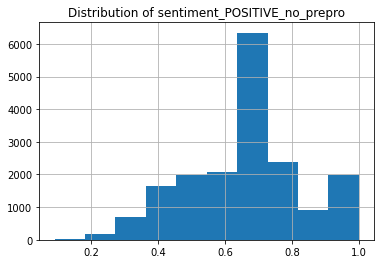

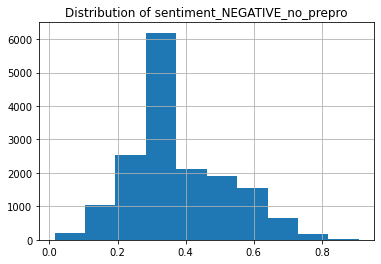

In [81]:
sent = ['sentiment_POSITIVE_no_prepro', 'sentiment_NEGATIVE_no_prepro']

for c in sent:
  df[c].hist()
  plt.title(f'Distribution of {c}')
  plt.show()

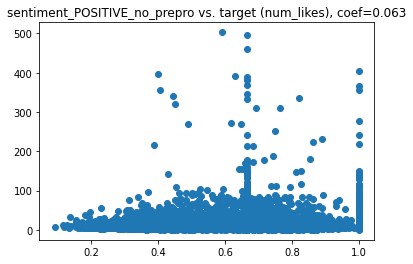

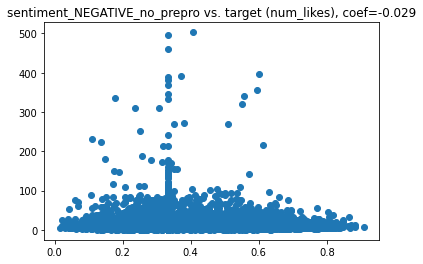

In [83]:
for c in sent:
  cor_ = df[c].corr(df['num_likes'])
  plt.scatter(df[c], df.num_likes)
  plt.title(f'{c} vs. target (num_likes), coef={cor_:.3f}')
  plt.show()

There is actually two correlations, each in a different direction. Interesting!

## Per paragraph lemmatization

Per paragraph after lemmatization. -- If we have time.

### with nltk

In [ ]:
import numpy as np
def sentiment(row):
  sent = []
  for x in row['lemmatized_parag']:
    sent.append(sia.polarity_scores(x)['compound'])
  row['sentiment_parag_nltk'] = np.mean(sent)
  return row

In [ ]:
if 'sentiment_parag_nltk' not in df.columns:
  df = df.progress_apply(sentiment, axis=1) #df['sentiment_parag_nltk']
  df[['sentiment_parag_nltk']].to_csv('drive/MyDrive/Final Project/sentiment_features/sentiment_parag_nltk.csv', index=False)

### EDA

In [ ]:
plt.scatter((df.sentiment-np.mean(df.sentiment))/np.std(df.sentiment), (df.num_likes-np.mean(df.num_likes))/np.std(df.num_likes))

In [ ]:
polarity_avg = df.groupby('num_likes')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('num_likes', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per num_likes ', fontsize=50)
plt.show()


In [ ]:
df[df[target]<100][target].hist()

In [ ]:
threshold = 20
df.loc[df[target]>threshold, 'target_bin'] = 1
df.loc[df[target]<threshold, 'target_bin'] = 0

In [ ]:
polarity_avg = df.groupby('num_likes')['sentiment'].mean().plot(kind='bar')
plt.xlabel('num_likes')
plt.ylabel('Average Sentiment')
plt.xticks()
plt.yticks()
plt.title('Average Sentiment per num_likes ')
plt.show()


### With hugging face transformer

In [ ]:
def sentiment_pipeline_def(row):
  sent = []
  try:
    for para in row['lemmatized_parag']:
      try:
        sent.append(sentiment_pipeline(para[:1500])[0]['label'])
      except:
        pass
    for label in set(sent):
      row['sentiment_' + label] = sent.count(label)/len(row['lemmatized_parag'])
    return row
  except:
    print('error: text too long?')

In [ ]:
splits = 80
chunk_size = int(df.shape[0] / splits-1)
df_subset = dict()
for start in range(0, df.shape[0], chunk_size):
    df_subset[start] = df.iloc[start:start + chunk_size]
fract = list(df_subset.keys())
for i,j in zip(range(1, len(fract)+1), fract):
  df_subset[i] = df_subset.pop(j)

In [ ]:
# each sentence
for i in tqdm(range(1, 80)):
  # apply function
  
  df_subset__ = df_subset[i].progress_apply(sentiment_pipeline_def, axis=1) # df['sentiment_POSITIVE'] df['sentiment_NEGATIVE']
    
  # save csv
  df_subset__[['sentiment_POSITIVE', 'sentiment_NEGATIVE']].to_csv(f'drive/MyDrive/Final Project/sentiment_features/hf_noprepro/sentiment_hf_parag_no_prepro_subset_{i}.csv', index=False)

In [ ]:
df['sentiment_hf_parag'] = df['words_in_str'].map(lambda x: sentiment_pipeline(x)['label'], batched=True)

### EDA

In [ ]:
df['sentiment_hf_parag'].value_counts().plot(kind = 'barh');
plt.title('sentiment_hf_parag'+' distribution')
plt.xlabel('count')
plt.ylabel('sentiment_hf_parag');

# END